In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import cv2
import matplotlib.pyplot as plt

In [4]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False,
                                                  weights='imagenet',
                                                  input_shape=(224,224,3))

16705208/16705208 [==============================] - 0s 0us/step


In [5]:
for layer in base_model.layers:
    layer.trainable=False
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0

In [6]:
# sigmoid 0-1 , prediction > 0.8 => 1, prediction < 0.3 => 0
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation = 'relu')(x)
output_layer = Dense(1, activation = 'sigmoid')(x)
our_efficient_model = Model(inputs = base_model.input, outputs = output_layer)
our_efficient_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]']   

In [ ]:
# classification train (2/15)

In [32]:
image_path = '/content/twenties_woman-29.jpeg'
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()  ## selective search initialize

In [33]:
image = cv2.imread(image_path)
ss.setBaseImage(image)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()

In [34]:
ssresults , len(ssresults)

(array([[233,  86,  25,  50],
        [187,   0,  25,  74],
        [137,  65,  10,  45],
        ...,
        [  0,   0, 152, 183],
        [  0,   0, 113, 183],
        [  0,  53, 275, 130]], dtype=int32),
 916)

array([[[246, 227, 220],
        [247, 228, 221],
        [249, 230, 223],
        ...,
        [254, 223, 144],
        [254, 223, 144],
        [254, 223, 144]],

       [[247, 228, 221],
        [248, 229, 222],
        [249, 230, 223],
        ...,
        [254, 223, 144],
        [254, 223, 144],
        [254, 223, 144]],

       [[249, 227, 221],
        [250, 228, 222],
        [249, 230, 223],
        ...,
        [255, 224, 145],
        [255, 224, 145],
        [255, 224, 145]],

       ...,

       [[255, 238, 233],
        [255, 239, 236],
        [247, 233, 234],
        ...,
        [219, 219, 233],
        [214, 213, 229],
        [216, 215, 231]],

       [[255, 239, 234],
        [255, 239, 236],
        [250, 236, 237],
        ...,
        [232, 232, 246],
        [214, 213, 229],
        [199, 198, 214]],

       [[255, 240, 235],
        [255, 241, 238],
        [254, 240, 241],
        ...,
        [239, 239, 253],
        [217, 216, 232],
        [198, 197, 213]]], dtype=uint8)
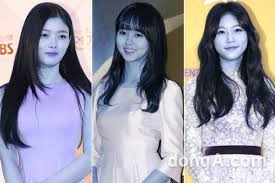

In [35]:
image

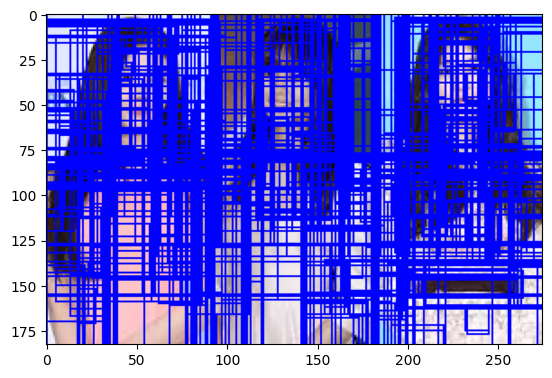

In [36]:
#(img, start, end, color, thickness
for box in ssresults:
    x,y,w,h = box
    cv2.rectangle(image, (x,y), (x + w, y+h), (255,0,0), 1)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [16]:
# fine tuning 진행
our_efficient_model.compile('adam', 'binary_crossentropy',metrics=['accuracy'])

In [17]:
# google drive mount 후
!rm -rf dataset
!mkdir dataset
!unzip /content/drive/MyDrive/age.zip -d dataset

Archive:  /content/drive/MyDrive/age.zip
   creating: dataset/fifties/
  inflating: dataset/fifties/fifties_actor-001.jpeg  
  inflating: dataset/fifties/fifties_actor-002.jpeg  
  inflating: dataset/fifties/fifties_actor-003.jpeg  
  inflating: dataset/fifties/fifties_actor-004.jpeg  
  inflating: dataset/fifties/fifties_actor-005.jpeg  
  inflating: dataset/fifties/fifties_actor-006.jpeg  
  inflating: dataset/fifties/fifties_actor-007.jpeg  
  inflating: dataset/fifties/fifties_actor-008.jpeg  
  inflating: dataset/fifties/fifties_actor-009.jpeg  
  inflating: dataset/fifties/fifties_actor-010.jpeg  
  inflating: dataset/fifties/fifties_actor-011.jpeg  
  inflating: dataset/fifties/fifties_actor-012.jpeg  
  inflating: dataset/fifties/fifties_actor-013.jpeg  
  inflating: dataset/fifties/fifties_actor-014.jpeg  
  inflating: dataset/fifties/fifties_actor-015.jpeg  
  inflating: dataset/fifties/fifties_actor-016.jpeg  
  inflating: dataset/fifties/fifties_actor-017.jpeg  
  inflating

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    'dataset/',
    target_size =(224,224),
    batch_size=32,
    class_mode='binary',
    subset = 'training'
)
validation_generator = train_datagen.flow_from_directory(
    'dataset/',
    target_size =(224,224),
    batch_size=32,
    class_mode='binary',
    subset = 'validation'
)

Found 457 images belonging to 2 classes.
Found 113 images belonging to 2 classes.


In [18]:
our_efficient_model.fit(train_generator,validation_data=validation_generator, epochs=10)

Epoch 1/10
15/15 [==============================] - 6s 430ms/step - loss: 0.6622 - accuracy: 0.6280 - val_loss: 0.6694 - val_accuracy: 0.6283
Epoch 2/10
15/15 [==============================] - 1s 83ms/step - loss: 0.6647 - accuracy: 0.6280 - val_loss: 0.6615 - val_accuracy: 0.6283
Epoch 3/10
15/15 [==============================] - 1s 86ms/step - loss: 0.6698 - accuracy: 0.6280 - val_loss: 0.6708 - val_accuracy: 0.6283
Epoch 4/10
15/15 [==============================] - 1s 85ms/step - loss: 0.6620 - accuracy: 0.6280 - val_loss: 0.6612 - val_accuracy: 0.6283
Epoch 5/10
15/15 [==============================] - 1s 84ms/step - loss: 0.6714 - accuracy: 0.6280 - val_loss: 0.6701 - val_accuracy: 0.6283
Epoch 6/10
15/15 [==============================] - 1s 86ms/step - loss: 0.6705 - accuracy: 0.6280 - val_loss: 0.6603 - val_accuracy: 0.6283
Epoch 7/10
15/15 [==============================] - 2s 100ms/step - loss: 0.6724 - accuracy: 0.6280 - val_loss: 0.6595 - val_accuracy: 0.6283
Epoch 8/10


In [19]:
len(our_efficient_model.layers)
#our_efficient_model.summary()

241

In [20]:
for layer in our_efficient_model.layers[:220]:
    layer.trainable = False
for layer in our_efficient_model.layers[220:]:
    layer.trainable = True

In [21]:
our_efficient_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]']   

In [22]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
our_efficient_model.compile(opt, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_path = '/content/drive/MyDrive/finetuning_detection'
mc = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                        monitor='val_loss',
                                        save_best_only=True)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

our_efficient_model.fit(train_generator,
                        validation_data=validation_generator,
                        epochs=100,
                        callbacks = [mc,es],
                        validation_split=0.2)

Epoch 1/100
15/15 [==============================] - 39s 2s/step - loss: 0.6775 - accuracy: 0.6193 - val_loss: 0.6604 - val_accuracy: 0.6283
Epoch 2/100
15/15 [==============================] - 26s 2s/step - loss: 0.6710 - accuracy: 0.6258 - val_loss: 0.6603 - val_accuracy: 0.6283
Epoch 3/100
15/15 [==============================] - 26s 2s/step - loss: 0.6692 - accuracy: 0.6149 - val_loss: 0.6601 - val_accuracy: 0.6283
Epoch 4/100
15/15 [==============================] - 1s 95ms/step - loss: 0.6763 - accuracy: 0.6236 - val_loss: 0.6604 - val_accuracy: 0.6283
Epoch 5/100
15/15 [==============================] - 2s 100ms/step - loss: 0.6591 - accuracy: 0.6324 - val_loss: 0.6611 - val_accuracy: 0.6283
Epoch 6/100
15/15 [==============================] - 2s 127ms/step - loss: 0.6679 - accuracy: 0.6258 - val_loss: 0.6611 - val_accuracy: 0.6283
Epoch 7/100
15/15 [==============================] - 1s 90ms/step - loss: 0.6595 - accuracy: 0.6280 - val_loss: 0.6606 - val_accuracy: 0.6283
Epoch 8

In [19]:
our_efficient_model.load_weights('/content/drive/MyDrive/finetuning_detection')

In [37]:
# detection 진행
image = cv2.imread(image_path)
cropped_image = []
# ss 제안 받은 영역 crop
for box in ssresults:
    x, y, w, h = box
    crop = image[ y:y+h, x:x+w]
    cropped_image.append(crop)

# crop 한 영역을 전처리
preprocessed_image = []
for img in cropped_image:
    resized_image = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
    normalized_image = resized_image / 255.0
    preprocessed_image.append(normalized_image)

import numpy as np
preprocessed_image = np.array(preprocessed_image)


In [38]:
scores = our_efficient_model.predict(preprocessed_image)
# 1. 0,5 이상이면 1, 0,5미만이면 0클래스로
# 2. 각각 클래스에 대한 좌표값과 예측결과 값을 같이
# 3. 0번 클래스는 [preprocessed_image[0] 좌표값(x, y, w, h), 1 - 0.2]
# 4. 1번 클래스는 [preprocessed_image[1] 좌표값(x, y, w, h), 0.99]

29/29 [==============================] - 61s 2s/step


In [39]:
scores.shape

(916, 1)

In [40]:
one_class = []
zero_class = []
threshold = 0.6
for idx, score in enumerate(scores):
    if score[0] >= 0.5:
        x, y, w, h = ssresults[idx]
        if score[0] > threshold:
            one_class.append([x, y, w, h, score[0]])
    else:
        x, y, w, h = ssresults[idx]
        if 1-score[0] > threshold:
            zero_class.append([x, y, w, h, 1 - score[0]])
one_class, zero_class

([],
 [[233, 86, 25, 50, 0.64436936378479],
  [187, 0, 25, 74, 0.643806129693985],
  [137, 65, 10, 45, 0.644299328327179],
  [262, 64, 13, 38, 0.6441707015037537],
  [209, 3, 40, 19, 0.6442312598228455],
  [248, 111, 10, 25, 0.6441409289836884],
  [203, 0, 37, 11, 0.64393749833107],
  [167, 26, 16, 92, 0.6440134942531586],
  [39, 96, 54, 87, 0.6441473364830017],
  [160, 154, 23, 29, 0.6440132558345795],
  [33, 116, 49, 31, 0.6442721486091614],
  [17, 81, 64, 102, 0.6444144546985626],
  [95, 0, 65, 66, 0.6445939242839813],
  [195, 2, 80, 130, 0.6448613405227661],
  [59, 19, 18, 66, 0.6446267664432526],
  [246, 108, 17, 31, 0.644323080778122],
  [0, 128, 32, 42, 0.6443324983119965],
  [257, 112, 18, 25, 0.6442401707172394],
  [18, 79, 36, 56, 0.6444014608860016],
  [92, 128, 28, 55, 0.6439140737056732],
  [34, 13, 22, 18, 0.6443812251091003],
  [177, 96, 44, 87, 0.6446135938167572],
  [182, 0, 2, 120, 0.6441673934459686],
  [120, 4, 43, 108, 0.644755095243454],
  [194, 33, 45, 96, 0.6445

In [45]:
bbox = []
scores_list = []
for box in one_class:
    x,y,w,h = box[:-1]
    bbox.append([x,y,x+w,y+h])
    scores_list.append(box[-1])

nms_idices_one = cv2.dnn.NMSBoxes(bbox, scores_list ,
                       score_threshold=0.6, nms_threshold=0.5)

nms_boxes_one = [bbox[i] for i in nms_idices_one]
nms_scores_one = [scores_list[i] for i in nms_idices_one]
# boxes_x2y2 =  []
#cv2.dnn.NMSBoxes()
# nms threshold = BBOX간 겹침의 허용 정도 (0.3 ~ 0.5)
# score threshold = BBOX의 prediction 허용 정도 (이 수치값을 넘어야 객체로 인정)

In [49]:
bbox = []
scores_list = []
for box in zero_class:
    x,y,w,h = box[:-1]
    bbox.append([x,y,x+w,y+h])
    scores_list.append(box[-1])

nms_idices_zero = cv2.dnn.NMSBoxes(bbox, scores_list ,
                       score_threshold=0.6, nms_threshold=0.5)

nms_boxes_zero = [bbox[i] for i in nms_idices_zero]
nms_scores_zero = [scores_list[i] for i in nms_idices_zero]


In [50]:
nms_scores_zero

[0.6461311876773834,
 0.6458723843097687,
 0.6452312469482422,
 0.6451313495635986,
 0.6451196074485779,
 0.6450951397418976,
 0.6450644135475159,
 0.6450091600418091,
 0.645008385181427,
 0.6450079679489136,
 0.6448859870433807,
 0.6448078751564026,
 0.6447898149490356,
 0.644755095243454,
 0.6447281241416931,
 0.6446783244609833,
 0.6446501910686493,
 0.6446267664432526,
 0.6446249186992645,
 0.6446191966533661,
 0.6446180939674377,
 0.6446124315261841,
 0.6446024477481842,
 0.6445953547954559,
 0.6445937752723694,
 0.6445916891098022,
 0.6445879340171814,
 0.644586443901062,
 0.6445796191692352,
 0.6445688009262085,
 0.6445554792881012,
 0.6445448994636536,
 0.6445401608943939,
 0.6445327997207642,
 0.6445287466049194,
 0.64451003074646,
 0.6445062160491943,
 0.644495815038681,
 0.644492894411087,
 0.6444854140281677,
 0.6444847881793976,
 0.6444766521453857,
 0.6444669961929321,
 0.6444556713104248,
 0.6444433331489563,
 0.6444296538829803,
 0.644423097372055,
 0.6444160640239716,


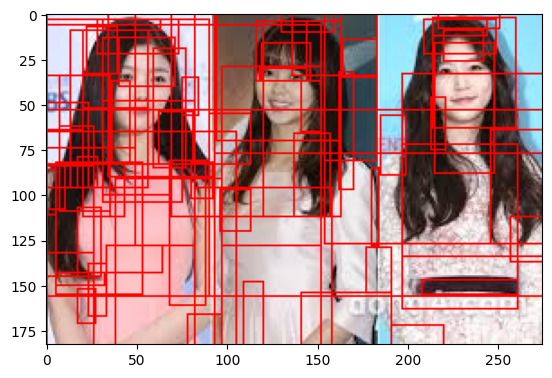

In [51]:
for box in nms_boxes_one:
    xmin,ymin,xmax,ymax = box
    cv2.rectangle(image, (xmin,ymin), (xmax, ymax), (255,0,0), 1)

for box in nms_boxes_zero:
    xmin,ymin,xmax,ymax = box
    cv2.rectangle(image, (xmin,ymin), (xmax, ymax), (0,0,255), 1)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
# 1번 클래스(파란색)만 출력을 하고 있음, 0번 클래스(빨간색)도 그려서 출력하는 코드를 위에서 추가
# 리팩토링은 고려 X